In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

#                                                   Introduction
```js
        The Gradient Descent is used here is for Simple Linear Regression where we have 1 Input Column and obviously 1 Output Column.

        The equations and intutions are hand written from scratch in "Gradient Descent for Simple LR.pdf"
```

#                                               Gradient Descent for 'b'.
```js
    Here we are assuming 'm' is given which we will calculate by the OLS method (OLS Method = Direct Equation which LinearRegression model from Sklearn uses).

    i)   Actually we will use LinearRegression model from Sklearn to compute both m and b.
    ii)  Use the m to 'compute b using Gradient Descent'.
    iii) Compare the b we calculted in 2.ii with the b from 2.i, to see if b is correct.

    The below 3 codes are linked with each other. Run the 1st one to run the 2nd/3rd one.
    
```

In [2]:
#                                       Here we just calculated m and b using sklearn.

# 1 Input column (100, 1), 1 Output column (100, 1). X and Y creates Linear Data.
X, Y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)
Y = Y.reshape((Y.shape[0], 1)) # Above Y.shape = (100,). This line's Y.shape = (100, 1).

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(X = x_train, y = y_train) # calculated m, b for the future prediction.
m, b = lr.coef_, lr.intercept_
print(f"m = {m[0][0]}, b = {b[0]}")

m = 28.125973315135614, b = -2.2710144261783825


m = 28.1259, b = -2.2710107130038946

           slope          b
0  -1.563664e+04  56.366383
1   9.381983e+03 -37.453447
2  -5.629190e+03  18.838451
3   3.377514e+03 -14.936688
4  -2.026508e+03   5.328395
5   1.215905e+03  -6.830654
6  -7.295430e+02   0.464776
7   4.377258e+02  -3.912482
8  -2.626355e+02  -1.286128
9   1.575813e+02  -2.861941
10 -9.454877e+01  -1.916453
11  5.672926e+01  -2.483745
12 -3.403756e+01  -2.143370
13  2.042253e+01  -2.347595
14 -1.225352e+01  -2.225060
15  7.352113e+00  -2.298581
16 -4.411268e+00  -2.254468
17  2.646761e+00  -2.280936
18 -1.588056e+00  -2.265056
19  9.528338e-01  -2.274584
20 -5.717003e-01  -2.268867
21  3.430202e-01  -2.272297
22 -2.058121e-01  -2.270239
23  1.234873e-01  -2.271474
24 -7.409236e-02  -2.270733
25  4.445541e-02  -2.271177
26 -2.667325e-02  -2.270911
27  1.600395e-02  -2.271071
28 -9.602369e-03  -2.270975
29  5.761422e-03  -2.271032
30 -3.456853e-03  -2.270998
31  2.074112e-03  -2.271018
32 -1.244467e-03  -2.271006
33  7.4668

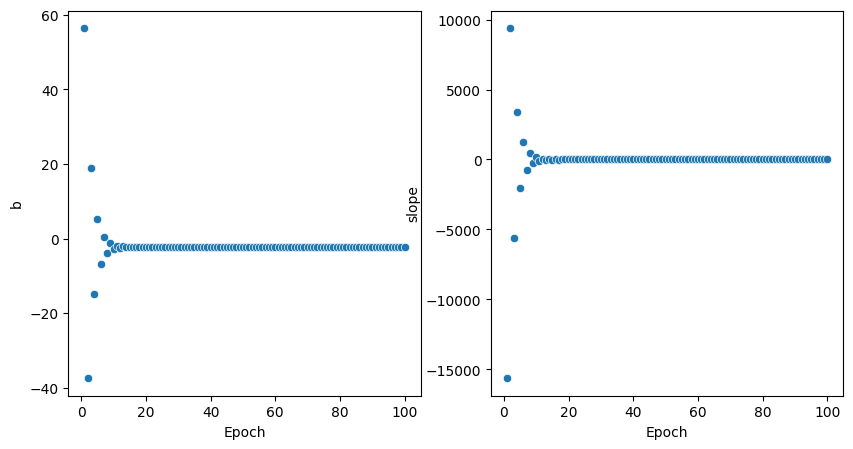

In [ ]:
#       Here I calculated 'b' using Gradient Descent from the Error/Loss Function and USING EPOCH i.e. TILL SPECIFIC LIMIT.
# I also showed the value of slope and b as dataframe to directly go any row number and to show the changes of slope and b.

df = pd.DataFrame(data={'slope' : [], 'b' : []})

class GDRegressor:
    def __init__(self, learning_rate: float, epochs: int):
        self.m = 28.1259 # the above m
        self.b = -100
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        x_train, y_train = x_train.ravel(), y_train.ravel() # They need to be in 1D Shape for easier calculation.
        slope_, b_ = [], []

        for i in range(self.epochs):
            slope = -2 * np.sum(y_train - self.m * x_train - self.b)
            self.b = self.b - self.learning_rate * slope

            slope_.append(slope); b_.append(self.b)
        
        print(f"m = {self.m}, b = {self.b}\n")
        df['slope'], df['b'] = slope_, b_

def main():
    gdr = GDRegressor(learning_rate = 0.01, epochs = 100)
    gdr.fit(x_train, y_train)

    print(df.head(60)) # shape (100, 2).
    
    #                                       How b and slope changes over time/loop/epoch.
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax1 = sns.scatterplot(x=df.index + 1, y=df['b'], ax=ax[0])
    ax1.set_xlabel("Epoch")
    ax2 = sns.scatterplot(x=df.index + 1, y=df['slope'], ax=ax[1])
    ax2.set_xlabel("Epoch")

if __name__ == "__main__":
    main()

explanation = """
From 21th row of df, we can see the slope is -2.27.... At the first rows both slope and b drastically decreased but later
from 21th row, regardless of the value of slope, 'b' remained 2.27...
"""

In [111]:
#       Here I calculated 'b' using Gradient Descent from the Error/Loss Function and USING WHILE LOOP i.e. until
#       the difference of b_new and b_old is not close to 0 i.e. loop will be closed when their diff is < 0.0001.

class GDRegressor:
    def __init__(self, learning_rate: float, epochs: int):
        self.m = 28.1259 # the above m.
        self.b = -100
        self.learning_rate = learning_rate
    
    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        x_train, y_train = x_train.ravel(), y_train.ravel() # They need to be in 1D Shape for easier calculation.
        b_old, b_new = self.b, 0

        while abs(b_new - b_old >= 0.0001): # b_old can be positive or negative. So took abs(difference).
            if b_new != 0: # In 1st loop it won't be executed.
                b_old = b_new
            slope          = -2 * np.sum(y_train - self.m * x_train - self.b)
            self.b = b_new = self.b - self.learning_rate * slope

        print(f"slope = {self.m}, m = {self.b}")

def main():
    gdr = GDRegressor(learning_rate = 0.001, epochs = 100)
    gdr.fit(x_train, y_train)

if __name__ == "__main__":
    main()

slope = 28.1259, m = -2.2715000109938233


#                                           Gradient Descent for both 'm' and 'b'.

In [122]:
class GDRegressor:
    def __init__(self, learning_rate: float, epochs: int):
        self.m =  100 # the above m
        self.b = -120
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        x_train, y_train = x_train.ravel(), y_train.ravel() # They need to be in 1D Shape for easier calculation.

        for i in range(self.epochs):
            slope_m = -2 * np.sum((y_train - self.m * x_train - self.b) * x_train)
            slope_b = -2 * np.sum(y_train - self.m * x_train - self.b)
            self.m  = self.m - self.learning_rate * slope_m
            self.b  = self.b - self.learning_rate * slope_b
        
        print(f"m = {self.m}, b = {self.b}\n")
    
    def predict(self, x_train: np.ndarray):
        return self.m * x_train + self.b
    
def main():
    # 1 Input column (100, 1), 1 Output column (100, 1). X and Y creates Linear Data.
    X, Y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)
    Y = Y.reshape((Y.shape[0], 1)) # Above Y.shape = (100,). This line's Y.shape = (100, 1).

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

    gdr = GDRegressor(learning_rate = 0.01, epochs = 100)
    gdr.fit(x_train, y_train)

    predict = x_test[0:1] # [[0.83090566]], 2D Shape.
    print(f"For {predict[0][0]}, the predicted value = {gdr.predict(predict)}.")

if __name__ == "__main__":
    main()

m = 28.12597331513561, b = -2.271014426178381

For 0.8309056578021413, the predicted value = [[21.09901593]].


```js
    To see visualizations of Gradient Discent, the effect of Learning Rate, the effect of Loss Function : Watch https://youtu.be/ORyfPJypKuU?si=3pITKtkVwVx8fSKn&t=5739 from 1:35:44 with 2x Speed.
```